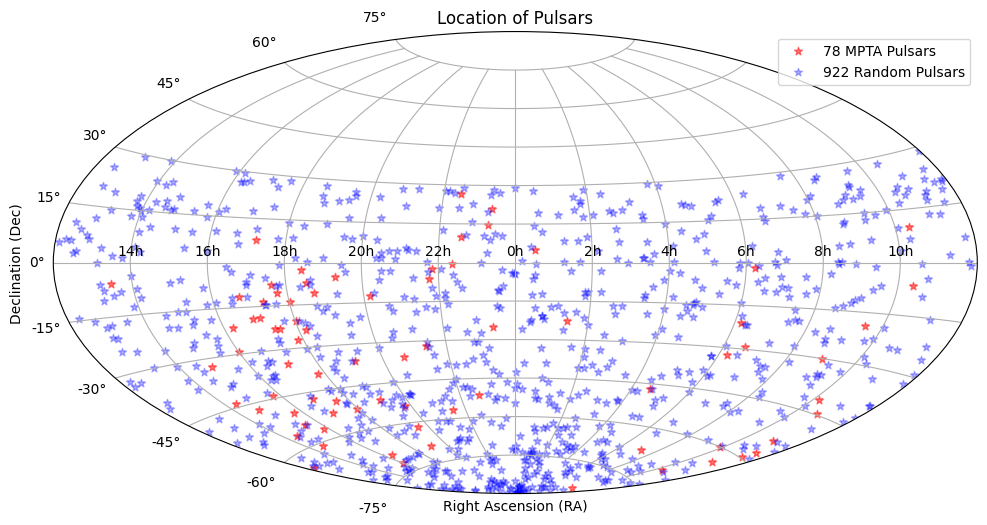

In [2]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import datetime

# Function to read RA and DEC from a file
def read_ra_dec(filename):
    ra_hour_min = []
    dec_deg_min = []
    with open(filename, 'r') as file:
        for line in file:
            data = line.split('\t')
            ra_hour_min.append(data[1])
            dec_deg_min.append(data[2])
    return ra_hour_min, dec_deg_min

# Read RA and DEC from mpta_PSR.txt file
mpta_ra_hour_min, mpta_dec_deg_min = read_ra_dec('mpta_PSR.txt')

# Convert RA from hour and min to hours
mpta_ra_hours = []
for ra in mpta_ra_hour_min:
    ra_parts = ra.split(':')
    mpta_ra_hours.append(float(ra_parts[0]) + float(ra_parts[1]) / 60)

# Convert DEC from degree and min to degrees
mpta_dec_deg = []
for dec in mpta_dec_deg_min:
    dec_parts = dec.split(':')
    mpta_dec_deg.append(float(dec_parts[0]) + float(dec_parts[1]) / 60)

# Create SkyCoord objects for All_PSR and mpta_PSR
mpta_coords = SkyCoord(ra=mpta_ra_hours*u.hourangle, dec=mpta_dec_deg*u.deg, frame='icrs')

total_psr = 1000
mpta_psrno = 78
random_pulsar_no = total_psr - mpta_psrno

# Generate random RA and DEC uniformly distributed across the sky
ra_random = np.random.uniform(0, 24, random_pulsar_no)  # Random RA in hours
dec_random = np.random.uniform(-90, 30, random_pulsar_no)  # Random DEC in degrees

# Create SkyCoord object for random coordinates
coords_random = SkyCoord(ra=ra_random*u.hourangle, dec=dec_random*u.deg, frame='icrs')
all_coords= SkyCoord(ra=ra_random*u.hourangle, dec=dec_random*u.deg, frame='icrs')
# Filter pulsars with declination below +30 degrees
all_coords_filtered = all_coords[all_coords.dec < 30*u.deg]
mpta_coords_filtered = mpta_coords[mpta_coords.dec < 30*u.deg]

# Plot the distribution
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='aitoff')

# Convert RA from hours to radians
mpta_ra_rad = mpta_coords_filtered.ra.wrap_at(180 * u.deg).radian
ra_random_rad = coords_random.ra.wrap_at(180 * u.deg).radian

# Plot using RA in hours
ax.scatter(mpta_ra_rad, mpta_coords_filtered.dec.radian, marker='*', color='red', label=f'{mpta_psrno} MPTA Pulsars', alpha=0.5)
ax.scatter(ra_random_rad, coords_random.dec.radian, marker='*', color='blue', label=f'{random_pulsar_no} Random Pulsars', alpha=0.3)
ax.grid(True)

# Set custom tick labels for RA
ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'])

plt.title('Location of Pulsars')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.legend()
plt.show()


In [15]:
(dec_random[0]-21)*60

31.01726470651556

In [14]:
((ra_random[0]-18)*60-45)*60

13.073086566934933